# **Entendimeinto del negocio**
Entidad fianriera entender el repcio de siversos activos con el objetivo de entender a futuro a la luz de las necesidades de sus clientes

# **Enfoque analitico**
Desarrollar un modelo basado en series de tiempo que permite predecir, con el menor error posible, el valor futuro del rpecio de un activo

# **Librerias**

In [81]:
!pip install yfinance
!pip install keras
!pip install tensorflow
!pip install mplfinance


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpl
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,LSTM
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score,mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

ImportError: cannot import name 'RandomForest' from 'keras.models' (c:\Users\Anime\Desktop\cientifica\.venv\lib\site-packages\keras\api\models\__init__.py)

Exploracion mediante velas jap

In [83]:
PG=yf.download('PG',start='2022-01-01',end='2024-10-29')
PG

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,PG,PG,PG,PG,PG,PG
Date,,,,,,
2022-01-03 00:00:00+00:00,151.253021,162.899994,162.940002,159.880005,161.690002,9317300
2022-01-04 00:00:00+00:00,151.782288,163.470001,164.389999,162.179993,162.289993,9253800
2022-01-05 00:00:00+00:00,152.469391,164.210007,165.320007,163.399994,163.440002,9330200
2022-01-06 00:00:00+00:00,151.188065,162.830002,165.199997,162.610001,164.339996,7556000
2022-01-07 00:00:00+00:00,151.104477,162.740005,163.529999,161.949997,163.130005,6098500
...,...,...,...,...,...,...
2024-10-22 00:00:00+00:00,169.699997,169.699997,170.729996,168.570007,168.570007,7511400
2024-10-23 00:00:00+00:00,169.580002,169.580002,170.169998,168.729996,169.550003,4837800


In [84]:
PG_2=pd.DataFrame()
PG_2['Open']=PG['Open']
PG_2['High']=PG['High']
PG_2['Low']=PG['Low']
PG_2['Close']=PG['Close']
PG_2
               


,Open,High,Low,Close
Date,,,,
2022-01-03 00:00:00+00:00,161.690002,162.940002,159.880005,162.899994
2022-01-04 00:00:00+00:00,162.289993,164.389999,162.179993,163.470001
2022-01-05 00:00:00+00:00,163.440002,165.320007,163.399994,164.210007
2022-01-06 00:00:00+00:00,164.339996,165.199997,162.610001,162.830002
2022-01-07 00:00:00+00:00,163.130005,163.529999,161.949997,162.740005
...,...,...,...,...
2024-10-22 00:00:00+00:00,168.570007,170.729996,168.570007,169.699997
2024-10-23 00:00:00+00:00,169.550003,170.169998,168.729996,169.580002
2024-10-24 00:00:00+00:00,169.419998,169.960007,168.929993,169.619995


<Figure size 1000x2000 with 0 Axes>

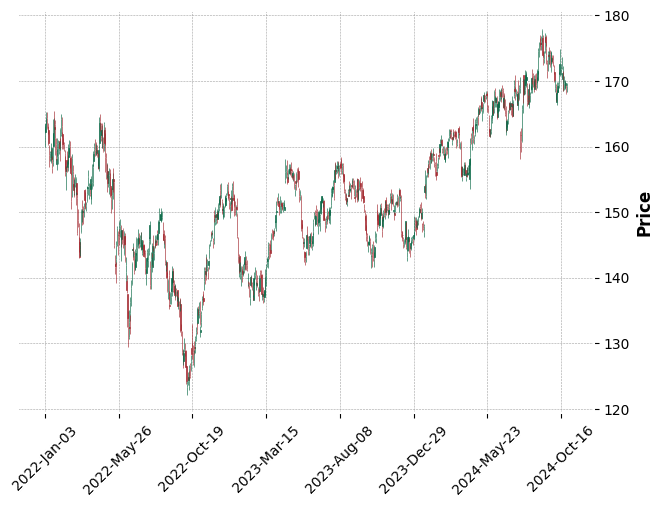

In [85]:
plt.figure(figsize=(10,20))
mpl.plot(PG_2,type='candle',style='charles')

<Figure size 1000x2000 with 0 Axes>

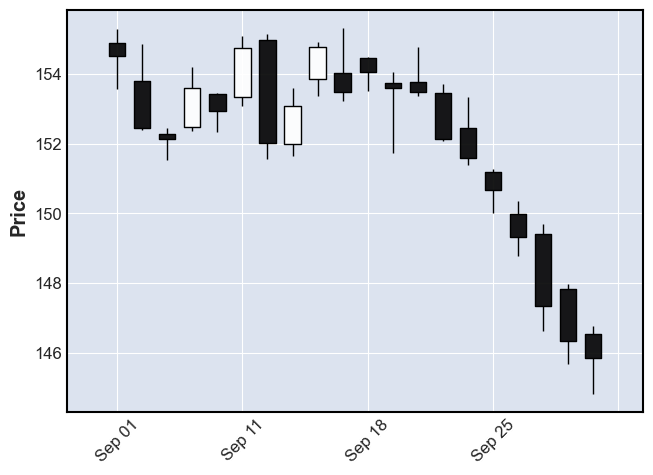

In [86]:
plt.figure(figsize=(10,20))
mpl.plot(PG_2.loc['2023-09-01':'2023-09-30'],type='candle')

In [87]:
activos=['TSLA','META','GE','AAPL']
data=pd.DataFrame()
for i in activos:
  data[i]=yf.download(i,start='2022-01-01',end='2024-10-29')['Adj Close']

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


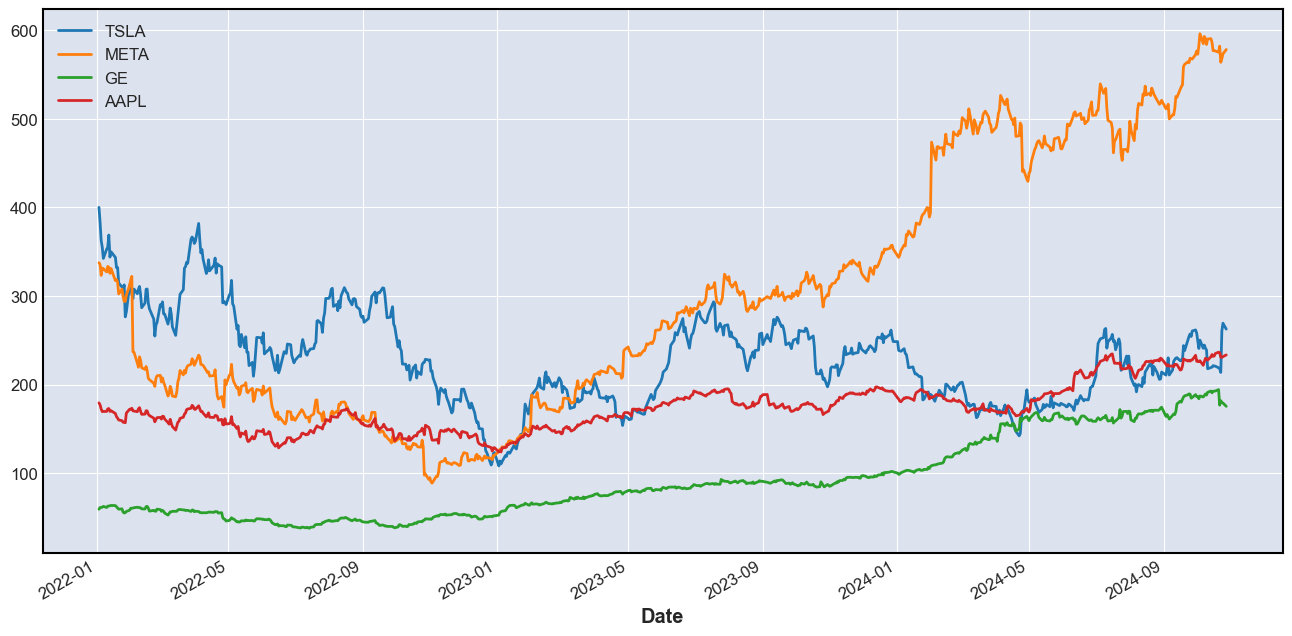

In [88]:
data.plot(figsize=(16,8))
plt.show()

PORTFOLIO

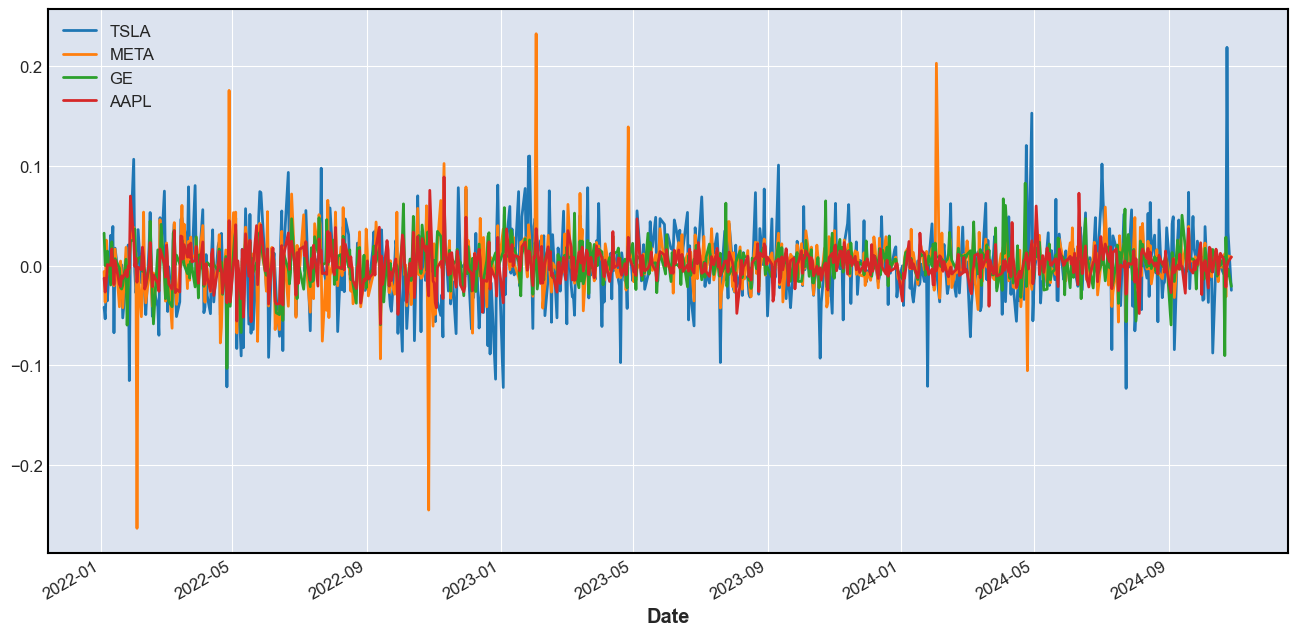

In [89]:
#Retorno simple
ret_simple=data.pct_change().dropna()
ret_simple.plot(figsize=(16,8))
plt.show()

Retorno Logaritmico
Eliminar las tendecnias exponenciales

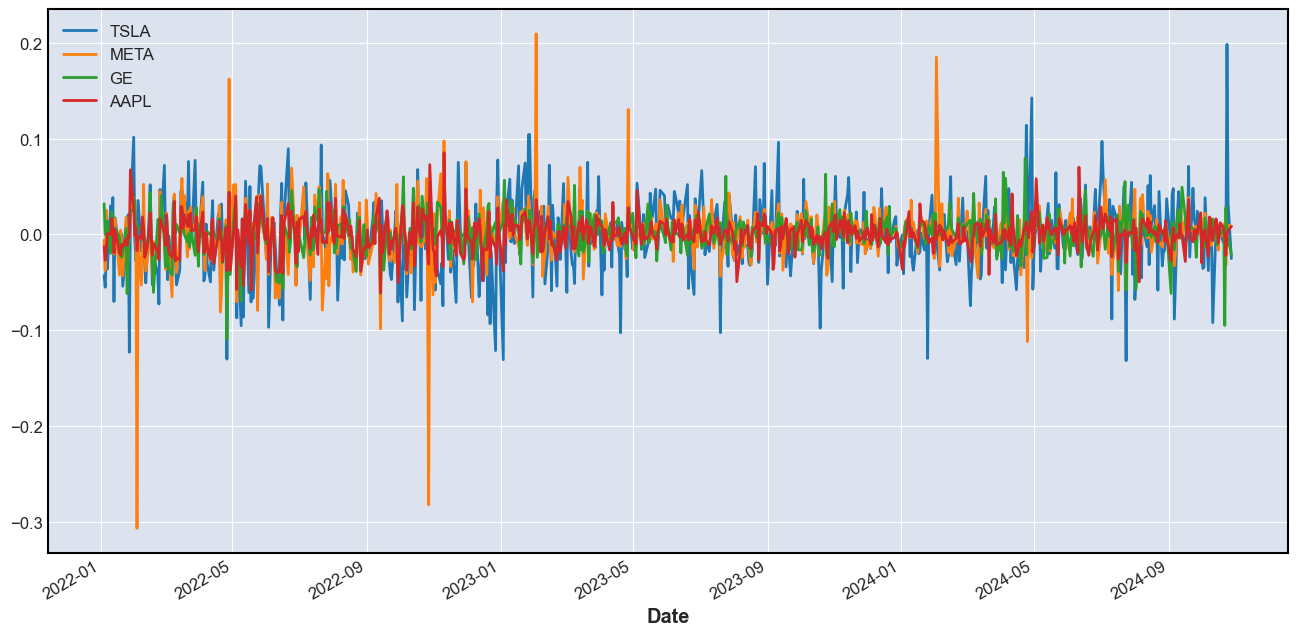

In [90]:
ret_log=np.log(data).diff().dropna()
ret_log.plot(figsize=(16,8))
plt.show()

# Rentabilidad

In [91]:
pesos= [0.25,0.25,0.25,0.25]
rentabilidad_portafolio=np.dot(ret_simple.mean()*252,pesos)

# Riesgo


In [92]:
riesgo_portafolio=np.sqrt(np.dot(np.transpose(pesos),np.dot(ret_log.cov()*252,pesos)))

In [93]:
print('Rentabilidad del portafolio:',rentabilidad_portafolio)
print('Riesgo del portafolio:',riesgo_portafolio)

Rentabilidad del portafolio: 0.22871631531991118
Riesgo del portafolio: 0.31359888203426367


# Modelos de deep learning

Como exiten datos nulos, toca hacer imputacion por interpolacion, se pude hacer con llenado hacia adelante o llenado hacia atras, pero tambien hay linear, cuadratica, media, pchip

In [41]:
data_pronostico = data.asfreq('D').ffill()

In [42]:
# Funcion paara transformar datos a supervisados

def serie_a_supervisado(data, n_in = 1, n_out = 1, dropnan = True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    #Secuencia de entrada (t-n, ..., t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j + 1, i)) for j in range(n_vars)]
    #Secuencia de pronósticos (t, t+1, ... ,t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j + 1)) for j in range(n_vars)]
        else:
            [('var%d(t+%d)' % (j + 1, i)) for j in range(n_vars)]
    #Agregar los frames
    agg = pd.concat(cols, axis = 1)
    agg.columns = names
    #Eliminar filas con datos nulos
    if dropnan:
        agg.dropna(inplace = True)
    return agg

In [43]:
steps=36
values=data_pronostico['TSLA'].values
values=values.astype('float64')
scaler=MinMaxScaler()
values=values.reshape(-1,1)
scaled_values=scaler.fit_transform(values)

reframed_data=serie_a_supervisado(scaled_values,steps,1)
reframed_data

,var1(t-36),var1(t-35),var1(t-34),var1(t-33),var1(t-32),var1(t-31),var1(t-30),var1(t-29),var1(t-28),var1(t-27),...,var1(t-9),var1(t-8),var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
36,1.000000,0.942671,0.872459,0.845707,0.802600,0.802600,0.802600,0.838192,0.845365,0.893133,...,0.596301,0.699525,0.693277,0.664047,0.647462,0.684219,0.684219,0.684219,0.665966,0.682711
37,0.942671,0.872459,0.845707,0.802600,0.802600,0.802600,0.838192,0.845365,0.893133,0.807854,...,0.699525,0.693277,0.664047,0.647462,0.684219,0.684219,0.684219,0.665966,0.682711,0.694133
38,0.872459,0.845707,0.802600,0.802600,0.802600,0.838192,0.845365,0.893133,0.807854,0.828471,...,0.693277,0.664047,0.647462,0.684219,0.684219,0.684219,0.665966,0.682711,0.694133,0.662779
39,0.845707,0.802600,0.802600,0.802600,0.838192,0.845365,0.893133,0.807854,0.828471,0.828471,...,0.664047,0.647462,0.684219,0.684219,0.684219,0.665966,0.682711,0.694133,0.662779,0.611893
40,0.802600,0.802600,0.802600,0.838192,0.845365,0.893133,0.807854,0.828471,0.828471,0.828471,...,0.647462,0.684219,0.684219,0.684219,0.665966,0.682711,0.694133,0.662779,0.611893,0.611893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,0.408119,0.465413,0.445984,0.445984,0.445984,0.486248,0.500880,0.510303,0.500708,0.522091,...,0.381973,0.388004,0.386497,0.385845,0.385845,0.385845,0.379506,0.376491,0.361687,0.522159
1026,0.465413,0.445984,0.445984,0.445984,0.486248,0.500880,0.510303,0.500708,0.522091,0.522091,...,0.388004,0.386497,0.385845,0.385845,0.385845,0.379506,0.376491,0.361687,0.522159,0.552006
1027,0.445984,0.445984,0.445984,0.486248,0.500880,0.510303,0.500708,0.522091,0.522091,0.522091,...,0.386497,0.385845,0.385845,0.385845,0.379506,0.376491,0.361687,0.522159,0.552006,0.552006
1028,0.445984,0.445984,0.486248,0.500880,0.510303,0.500708,0.522091,0.522091,0.522091,0.526100,...,0.385845,0.385845,0.385845,0.379506,0.376491,0.361687,0.522159,0.552006,0.552006,0.552006


In [44]:
# Dividir los conjuntos de entramiento y prueba

n_train_days=round(reframed_data.shape[0]*0.7)
values=reframed_data.values
train=values[:n_train_days,:]
test=values[n_train_days:,:]

In [45]:
X_train, y_train = train[:,:-1], train[:,-1]
X_test, y_test = test[:,:-1], test[:,-1]

In [ ]:
# Formaterar a X en unt ensor de 3 dimensiones [Cantidad de meustras, pasos temporales, cantidad de valores]

X_train=X_train.reshape((X_train.shape[0],1,X_train.shape[1]))
X_test=X_test.reshape((X_test.shape[0],1,X_test.shape[1]))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(696, 1, 36) (696,) (298, 1, 36) (298,)


Modelo de Red Neuronal Recurrente

In [ ]:
def modelo_recurrente():
    modelo=Sequential()
    modelo.add(Dense(steps,input_shape=(1,steps),activation='tanh'))
    modelo.add(Flatten())
    modelo.add(Dense(1,activation='tanh'))
    modelo.compile(loss='mean_absolute_error',optimizer="Adam",metrics = ['mae'])
    modelo.summary()
    return modelo

In [48]:
epochs=40
modelo= modelo_recurrente()
historia=modelo.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test),batch_size=steps)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 1, 36)          │         1,332 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 36)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            37 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,369 (5.35 KB)

 Trainable params: 1,369 (5.35 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1024 - mae: 0.1024 - val_loss: 0.0594 - val_mae: 0.0594
Epoch 2/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0493 - mae: 0.0493 - val_loss: 0.0337 - val_mae: 0.0337
Epoch 3/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0383 - mae: 0.0383 - val_loss: 0.0294 - val_mae: 0.0294
Epoch 4/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0359 - mae: 0.0359 - val_loss: 0.0279 - val_mae: 0.0279
Epoch 5/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0352 - mae: 0.0352 - val_loss: 0.0269 - val_mae: 0.0269
Epoch 6/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0325 - mae: 0.0325 - val_loss: 0.0261 - val_mae: 0.0261
Epoch 7/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0309 - mae: 0.0309 - val_loss: 0.0252 - val_mae: 0.0252
Epoch 8/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0330 - mae: 0.0330 - val_loss: 0.0343 - val_mae: 0.0343
Epoch 9/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0324 - mae: 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


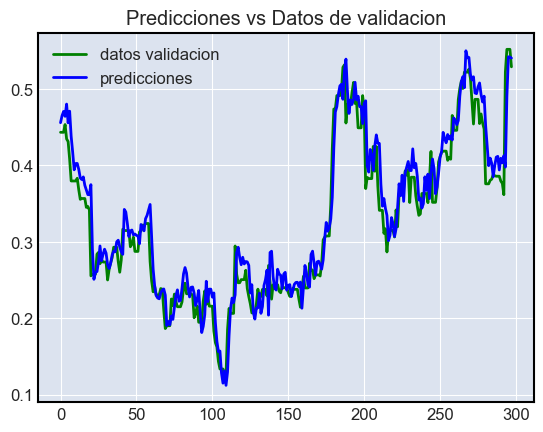

In [49]:
results= modelo.predict(X_test)
plt.plot(y_test, c='g',label='datos validacion')
plt.plot(results,c='b',label='predicciones')
plt.legend()
plt.title('Predicciones vs Datos de validacion')
plt.show()

In [50]:
#Mape del modelo
mean_absolute_error(y_test,results)

0.021889488923251852

# Modelo LSTM

In [51]:
def modelo_lstm():
    modelo=Sequential()
    modelo.add(LSTM(steps,input_shape=(1,steps),activation='tanh'))
    modelo.add(Flatten())
    modelo.add(Dense(1,activation='tanh'))
    modelo.compile(loss='mean_absolute_error',optimizer="Adam",metrics = ['mae'])
    modelo.summary()
    return modelo

In [52]:
modelo_2= modelo_lstm()
historia=modelo_2.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test),batch_size=steps)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 36)             │        10,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 36)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            37 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,549 (41.21 KB)

 Trainable params: 10,549 (41.21 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2744 - mae: 0.2744 - val_loss: 0.0981 - val_mae: 0.0981
Epoch 2/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0974 - mae: 0.0974 - val_loss: 0.0530 - val_mae: 0.0530
Epoch 3/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0763 - mae: 0.0763 - val_loss: 0.0471 - val_mae: 0.0471
Epoch 4/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0637 - mae: 0.0637 - val_loss: 0.0422 - val_mae: 0.0422
Epoch 5/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0554 - mae: 0.0554 - val_loss: 0.0393 - val_mae: 0.0393
Epoch 6/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0430 - mae: 0.0430 - val_loss: 0.0354 - val_mae: 0.0354
Epoch 7/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0391 - mae: 0.0391 - val_loss: 0.0318 - val_mae: 0.0318
Epoch 8/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0370 - mae: 0.0370 - val_loss: 0.0335 - val_mae: 0.0335
Epoch 9/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0334 - mae: 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


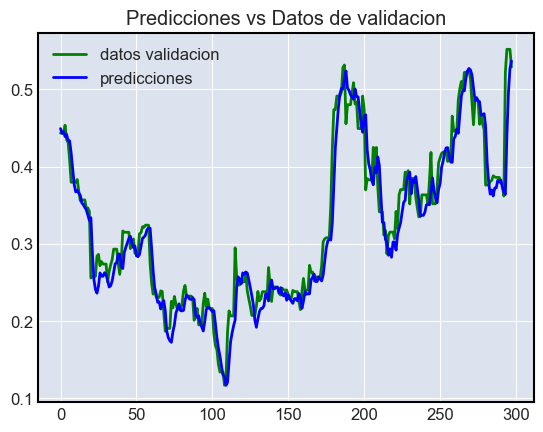

In [53]:
results= modelo_2.predict(X_test)
plt.plot(y_test, c='g',label='datos validacion')
plt.plot(results,c='b',label='predicciones')
plt.legend()
plt.title('Predicciones vs Datos de validacion')
plt.show()

In [54]:
#Mape del modelo
mean_absolute_error(y_test,results)

0.019051688794077235

Predecir futuros

In [ ]:
last_data=data_pronostico['TSLA']['2024-01-28':]
last_data

Date
2024-01-28 00:00:00+00:00    183.250000
2024-01-29 00:00:00+00:00    190.929993
2024-01-30 00:00:00+00:00    191.589996
2024-01-31 00:00:00+00:00    187.289993
2024-02-01 00:00:00+00:00    188.860001
                                ...    
2024-10-24 00:00:00+00:00    260.480011
2024-10-25 00:00:00+00:00    269.190002
2024-10-26 00:00:00+00:00    269.190002
2024-10-27 00:00:00+00:00    269.190002
2024-10-28 00:00:00+00:00    262.510010
Freq: D, Name: TSLA, Length: 275, dtype: float64

In [56]:
val_forecast=last_data.values
val_forecast=val_forecast.astype('float64')
val_forecast=val_forecast.reshape(-1,1)
scaled_forecast=scaler.fit_transform(val_forecast)
reframed_forecast=serie_a_supervisado(scaled_forecast,steps,1)

#Eliminar la ultima columna que seria y
reframed_forecast.drop(reframed_forecast[['var1(t)']],axis=1,inplace=True)
reframed_forecast

,var1(t-36),var1(t-35),var1(t-34),var1(t-33),var1(t-32),var1(t-31),var1(t-30),var1(t-29),var1(t-28),var1(t-27),...,var1(t-10),var1(t-9),var1(t-8),var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1)
36,0.324052,0.384458,0.389649,0.355828,0.368177,0.360705,0.360705,0.360705,0.306827,0.338603,...,0.392638,0.392638,0.392638,0.451077,0.453673,0.471842,0.470584,0.476561,0.476561,0.476561
37,0.384458,0.389649,0.355828,0.368177,0.360705,0.360705,0.360705,0.306827,0.338603,0.358109,...,0.392638,0.392638,0.451077,0.453673,0.471842,0.470584,0.476561,0.476561,0.476561,0.362514
38,0.389649,0.355828,0.368177,0.360705,0.360705,0.360705,0.306827,0.338603,0.358109,0.373683,...,0.392638,0.451077,0.453673,0.471842,0.470584,0.476561,0.476561,0.476561,0.362514,0.304310
39,0.355828,0.368177,0.360705,0.360705,0.360705,0.306827,0.338603,0.358109,0.373683,0.405223,...,0.451077,0.453673,0.471842,0.470584,0.476561,0.476561,0.476561,0.362514,0.304310,0.271276
40,0.368177,0.360705,0.360705,0.360705,0.306827,0.338603,0.358109,0.373683,0.405223,0.405223,...,0.453673,0.471842,0.470584,0.476561,0.476561,0.476561,0.362514,0.304310,0.271276,0.287872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,0.669734,0.801243,0.756646,0.756646,0.756646,0.849064,0.882649,0.904279,0.882256,0.931335,...,0.606497,0.609722,0.623565,0.620104,0.618609,0.618609,0.618609,0.604059,0.597137,0.563159
271,0.801243,0.756646,0.756646,0.756646,0.849064,0.882649,0.904279,0.882256,0.931335,0.931335,...,0.609722,0.623565,0.620104,0.618609,0.618609,0.618609,0.604059,0.597137,0.563159,0.931493
272,0.756646,0.756646,0.756646,0.849064,0.882649,0.904279,0.882256,0.931335,0.931335,0.931335,...,0.623565,0.620104,0.618609,0.618609,0.618609,0.604059,0.597137,0.563159,0.931493,1.000000
273,0.756646,0.756646,0.849064,0.882649,0.904279,0.882256,0.931335,0.931335,0.931335,0.940538,...,0.620104,0.618609,0.618609,0.618609,0.604059,0.597137,0.563159,0.931493,1.000000,1.000000


In [57]:
#Funcion para completar el paso del pronostico
def agregar_valor(X_test,nuevo_valor):
    for i in range(X_test.shape[2]-1):
        X_test[0][0][i]=X_test[0][0][i+1]
    X_test[0][0][X_test.shape[2]-1]=nuevo_valor
    return X_test

In [63]:
values=reframed_forecast.values
x_test=values[reframed_forecast.shape[0]-1:,:]
x_test=x_test.reshape((1, 1, x_test.shape[1]))
x_test

array([[[0.7566462 , 0.849064  , 0.88264906, 0.90427864, 0.88225577,
         0.93133545, 0.93133545, 0.93133545, 0.94053801, 0.91214399,
         0.841356  , 0.77560171, 0.84969325, 0.84969325, 0.84969325,
         0.7769388 , 0.8058046 , 0.77866919, 0.76073621, 0.59579991,
         0.59579991, 0.59579991, 0.60649678, 0.6097216 , 0.62356457,
         0.6201038 , 0.61860936, 0.61860936, 0.61860936, 0.60405855,
         0.597137  , 0.56315865, 0.93149291, 1.        , 1.        ,
         1.        ]]])

In [64]:
result_forecast=[]
for i in range(30):
    parcial=modelo_2.predict(x_test)
    result_forecast.append(parcial[0])
    print(x_test)
    x_test=agregar_valor(x_test,parcial[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[[0.7566462  0.849064   0.88264906 0.90427864 0.88225577 0.93133545
   0.93133545 0.93133545 0.94053801 0.91214399 0.841356   0.77560171
   0.84969325 0.84969325 0.84969325 0.7769388  0.8058046  0.77866919
   0.76073621 0.59579991 0.59579991 0.59579991 0.60649678 0.6097216
   0.62356457 0.6201038  0.61860936 0.61860936 0.61860936 0.60405855
   0.597137   0.56315865 0.93149291 1.         1.         1.        ]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[[[0.849064   0.88264906 0.90427864 0.88225577 0.93133545 0.93133545
   0.93133545 0.94053801 0.91214399 0.841356   0.77560171 0.84969325
   0.84969325 0.84969325 0.7769388  0.8058046  0.77866919 0.76073621
   0.59579991 0.59579991 0.59579991 0.60649678 0.6097216  0.62356457
   0.6201038  0.61860936 0.61860936 0.61860936 0.60405855 0.597137
   0.56315865 0.93149291 1.         1.         1.         0.83295679]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[[[0.88264906 0.90427864 0.88225577 0.93133545 0.931335

In [65]:
result_forecast

[array([0.8329568], dtype=float32),
 array([0.8187706], dtype=float32),
 array([0.7963755], dtype=float32),
 array([0.76848865], dtype=float32),
 array([0.73451614], dtype=float32),
 array([0.6964464], dtype=float32),
 array([0.6842966], dtype=float32),
 array([0.671107], dtype=float32),
 array([0.6699746], dtype=float32),
 array([0.6457592], dtype=float32),
 array([0.6265318], dtype=float32),
 array([0.6078816], dtype=float32),
 array([0.5820087], dtype=float32),
 array([0.57622266], dtype=float32),
 array([0.556886], dtype=float32),
 array([0.5226912], dtype=float32),
 array([0.51013607], dtype=float32),
 array([0.5109011], dtype=float32),
 array([0.4851256], dtype=float32),
 array([0.48767224], dtype=float32),
 array([0.49462274], dtype=float32),
 array([0.49146405], dtype=float32),
 array([0.50584364], dtype=float32),
 array([0.50439435], dtype=float32),
 array([0.5036808], dtype=float32),
 array([0.49120587], dtype=float32),
 array([0.50543183], dtype=float32),
 array([0.4935399],

In [66]:
valores=[x for x in result_forecast]
inverse=scaler.inverse_transform(valores)
inverse

array([[247.95212894],
       [246.14849504],
       [243.3011853 ],
       [239.75564898],
       [235.43638513],
       [230.59620031],
       [229.05147337],
       [227.37454588],
       [227.23057648],
       [224.15183051],
       [221.70725315],
       [219.33607002],
       [216.04659129],
       [215.31095146],
       [212.85249095],
       [208.50496066],
       [206.90870241],
       [207.00596777],
       [203.7288717 ],
       [204.05265129],
       [204.93633755],
       [204.53474189],
       [206.36296305],
       [206.17870071],
       [206.08798286],
       [204.5019172 ],
       [206.31060572],
       [204.79866558],
       [201.51002802],
       [200.19606286]])

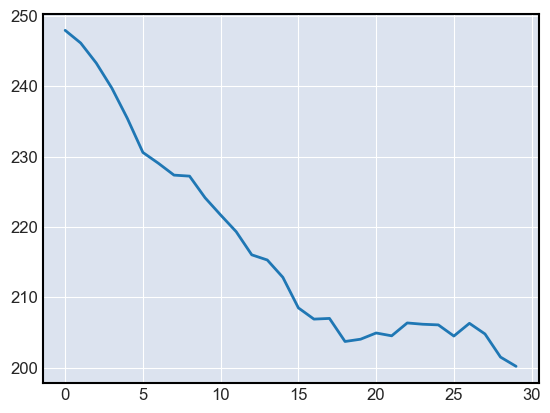

In [97]:
plt.plot(inverse)